In [14]:
%run Functions.ipynb

# PCA with EEG Data
* Can reducing dimensions of data classifcation score?

In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('ggplot')
import seaborn as sns
import mne
from mne.datasets import sample
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
#for scaling data into n_sample * n_feature array
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#classifer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
import mne
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                         cross_val_multiscore, LinearModel, get_coef, Vectorizer,CSP)


import os
import os.path as op
from os import listdir
from os.path import isfile, join

from sklearn.decomposition import PCA, FastICA

In [16]:
# path = 'E:\eeg_data'
path = 'C:\Users\Esimk\OneDrive\Desktop\eeg_data'
# reading all data at once will take up lots of memory. don't do it...
# all_files = read_epoch_files(path)

In [17]:
subject_runs = []
for file in os.listdir(path):
    if file.endswith(".fif"):
        subject_runs.append(os.path.join(path, file))

In [18]:
filtered_epoch_files = []
n_epochs = 200
for f in subject_runs:
    epochs = mne.read_epochs(f, preload=True)
    if len(epochs.events[:,-1]) >=200:
        filtered_epoch_files.append(f)

Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an SSP operator (subspace dimension = 1)
286 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\ee

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj14_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
275 matching events found
Created an SSP operator (subspace dimension = 1)
275 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj15_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 pr

        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
287 matching events found
Created an SSP operator (subspace dimension = 1)
287 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj19_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
183 matching events found
Created an SSP operator (subspace dimension = 1)
183 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj19_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) act

        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj22_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
278 matching events found
Created an SSP operator (subspace dimension = 1)
278 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj22_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
 

11 matching events found
Created an SSP operator (subspace dimension = 1)
11 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj26_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
2 matching events found
Created an SSP operator (subspace dimension = 1)
2 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj27_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
302 matching events found
Created an SSP operato

202 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj4_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj4_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
275 matching events found
Created an SSP operator (subspace dimension = 1)
275 matching events found
Created an SSP ope

1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj8_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
293 matching events found
Created an SSP operator (subspace dimension = 1)
293 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj8_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading C:\User

In [20]:
len(filtered_epoch_files)
# epochs = mne.read_epochs(, preload=True)

83

In [21]:
# all_filtered_files = filter_numb_epochs(all_files, n_epochs=200)

In [122]:
#get a random epoch file greater than 200 epochs
np.random.seed(42)
epoch_f = filtered_epoch_files[np.random.choice(len(filtered_epoch_files))]
print("epoch file name", epoch_f)
epochs = mne.read_epochs(epoch_f, preload=True)

('epoch file name', 'C:\\Users\\Esimk\\OneDrive\\Desktop\\eeg_data\\Ex10_Suj24_Run4-epo.fif')
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj24_Run4-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
263 matching events found
Created an SSP operator (subspace dimension = 1)
263 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [123]:
# #get a random epoch file
# np.random.seed(42)
# epochs = all_filtered_files[np.random.choice(len(all_filtered_files))]

## Use PCA on the epoch file 
* How do we choose the optimal number of components?
    1. Compute Average squared projection error (can't find any info on projection error)
    2. Total variation in data 
    3. divide total variation in data by average squared projection error.
        * If value is less than a threshold (usually 0.01) then it is a good fit.
    4. This process is referred to as % of variance retained. 

In [124]:
hype_kwargs = dict(penalty = 'l2')
clf = pipeline(classifier='LogisticRegression', hype_kwargs=hype_kwargs)

<class 'sklearn.linear_model.logistic.LogisticRegression'>


In [125]:
epochs = filter_events(epochs, [4,5])
X = epochs.get_data()
y = epochs.events[:,-1]
pca = UnsupervisedSpatialFilter(PCA(),  average=False)

pca.fit_transform(X);

127 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped


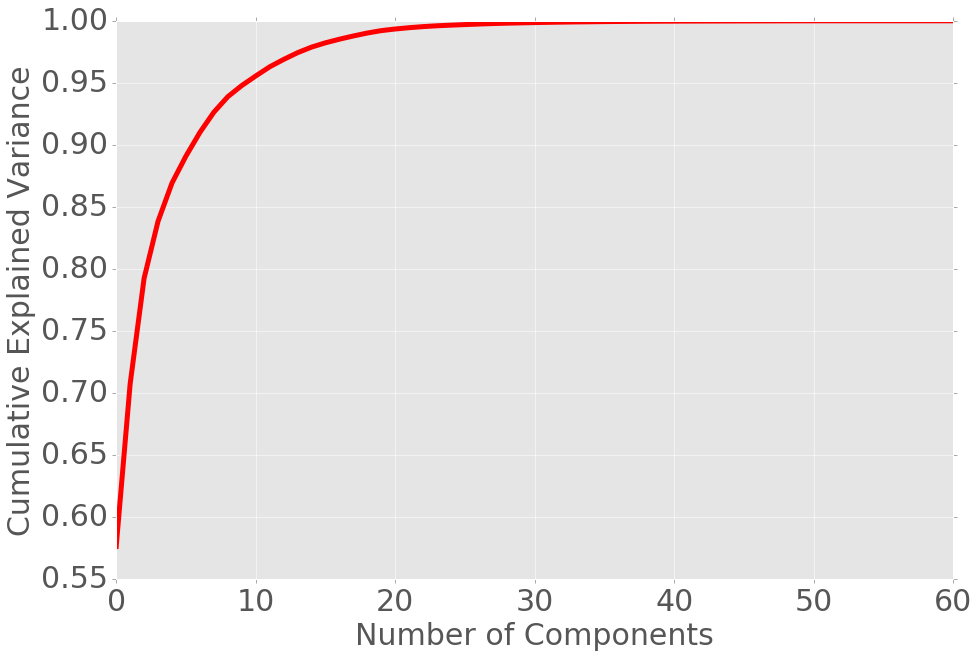

In [126]:
# plot the cumulative explained variance ratio
evr = np.cumsum(pca.estimator.explained_variance_ratio_)
plt.plot(evr, linewidth = 5.0, color = 'r')
plt.xlabel('Number of Components', fontsize = 30)
plt.ylabel('Cumulative Explained Variance', fontsize = 30);
plt.xticks(fontsize = 30);
plt.yticks(fontsize = 30);
# plt.grid()

In [127]:
# extract minimum number of components where % variance retained is 99%
n_components = np.argwhere(evr > .95)[0]
print(n_components)

[10]


In [129]:
evr[10]

0.95548181126559617

## Perform classification with all components and n_components with PCA
* We now know that 18 components is the minimum number that retains 99% of variance.


In [28]:
#filter for events [4,5]
epochs = filter_events(epochs, [4,5])
X = epochs.get_data()
y = epochs.events[:,-1]
#initailze pca
pca = UnsupervisedSpatialFilter(PCA(n_components),  average=False)
#transform data
pca_data = pca.fit_transform(X)

C:\Users\Esimk\Anaconda3\envs\mne\lib\site-packages\sklearn\utils\extmath.py:197: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  Q = random_state.normal(size=(A.shape[1], size))
C:\Users\Esimk\Anaconda3\envs\mne\lib\site-packages\sklearn\utils\extmath.py:349: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  return U[:, :n_components], s[:n_components], V[:n_components, :]


In [29]:
#cross validation
cv = StratifiedKFold(n_splits = 10, shuffle=True)

#fit with cross validation on original data
preds = np.empty(len(y))
scores = []
for train, test, in cv.split(X, y):
    clf.fit(X[train], y[train])
#     preds[test] = clf.predict(X[test])
    scores.append(clf.score(X[test],y[test]))

In [30]:
print("mean classification score", np.mean(scores))

('mean classification score', 0.71794871794871795)


In [31]:
clf = pipeline(classifier='LogisticRegression', hype_kwargs=hype_kwargs)

<class 'sklearn.linear_model.logistic.LogisticRegression'>


In [32]:
pca_preds = np.empty(len(y))
pca_scores = []
for train, test, in cv.split(pca_data, y):
    clf.fit(pca_data[train], y[train])
#     preds[test] = clf.predict(X[test])
    scores.append(clf.score(pca_data[test],y[test]))

In [33]:
print("pca with 18 compoentns mean classification score", np.mean(scores))

('pca with 18 compoentns mean classification score', 0.70641025641025634)


## What was the goal of PCA?

# Plot this data in 2D to visualize events

In [34]:
# convert to 2 channel data
pca = UnsupervisedSpatialFilter(PCA(2),  average=False)

In [35]:
vectorizer = Vectorizer()
vect_data = vectorizer.fit_transform(X)
print("vectorized data shape", vect_data.shape)

('vectorized data shape', (127L, 85461L))


In [36]:
pca = PCA(10)

In [37]:
projected = pca.fit_transform(vect_data)

In [38]:
print("vectorized data shape", vect_data.shape)
print("projected shape", projected.shape)

('vectorized data shape', (127L, 85461L))
('projected shape', (127L, 10L))


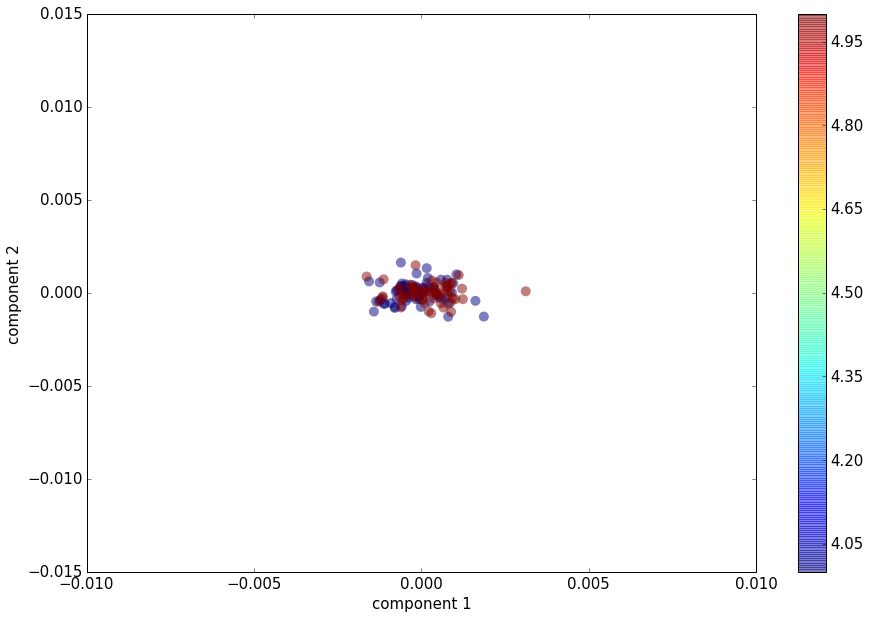

In [41]:
plt.scatter(projected[:, 4], projected[:, 9],
            c=y, edgecolor='none', alpha=0.5, s = 100)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


## Pearson correlation coefficient for pairs of channels

In [42]:
# lets look at one epoch
epoch_data = epochs.get_data()
print(epoch_data.shape)

(127L, 61L, 1401L)


In [43]:
corr = np.corrcoef(epoch_data[0])
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

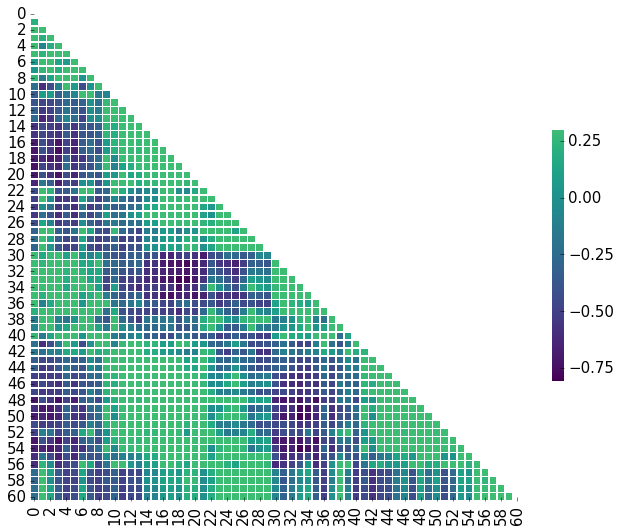

In [44]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap= 'viridis', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

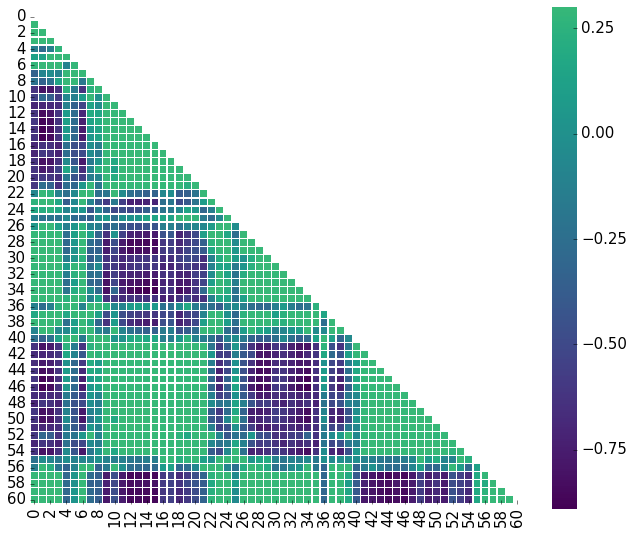

In [56]:
corr = np.corrcoef(epoch_data[1])
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask = mask, cmap= 'viridis', vmax=.3, center=0,
            square=True, linewidths=.2);

In [46]:
#looking at the above I can extract channels from a sqare patch of dark blue.
# eye balling here, i would say... 9-21 and 25-35
ep_copy = epochs.copy()
ep_copy.pick_channels(ep_copy.ch_names[41:47] + ep_copy.ch_names[57:61] )

<Epochs  |  n_events : 127 (all good), tmin : 0.0 (s), tmax : 1.4 (s), baseline : (0.0, 0.0), ~13.6 MB, data loaded,
 u'new': 67, u'scramble': 60>

In [47]:
X = ep_copy.get_data()
y = ep_copy.events[:,-1]

In [48]:
clf = pipeline(classifier='LogisticRegression',hype_kwargs=hype_kwargs)

<class 'sklearn.linear_model.logistic.LogisticRegression'>


In [49]:
#cross validation
cv = StratifiedKFold(n_splits = 10, shuffle=True)

#fit with cross validation on original data
preds = np.empty(len(y))
scores = []
for train, test, in cv.split(X, y):
    clf.fit(X[train], y[train])
#     preds[test] = clf.predict(X[test])
    scores.append(clf.score(X[test],y[test]))

In [50]:
print("scores of negatively correlated channels:", np.mean(scores))
print(scores)

('scores of negatively correlated channels:', 0.70961538461538454)
[0.76923076923076927, 0.61538461538461542, 0.38461538461538464, 0.76923076923076927, 0.84615384615384615, 0.76923076923076927, 0.69230769230769229, 0.66666666666666663, 0.75, 0.83333333333333337]


## Extract Instrinsic Paramters

In [58]:
X = epochs.get_data()[0].T
# clf = make_pipeline(StandardScaler(), PCA())
# clf.fit(X)
pca = PCA()
scaler = StandardScaler()
clf = make_pipeline(scaler, pca)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

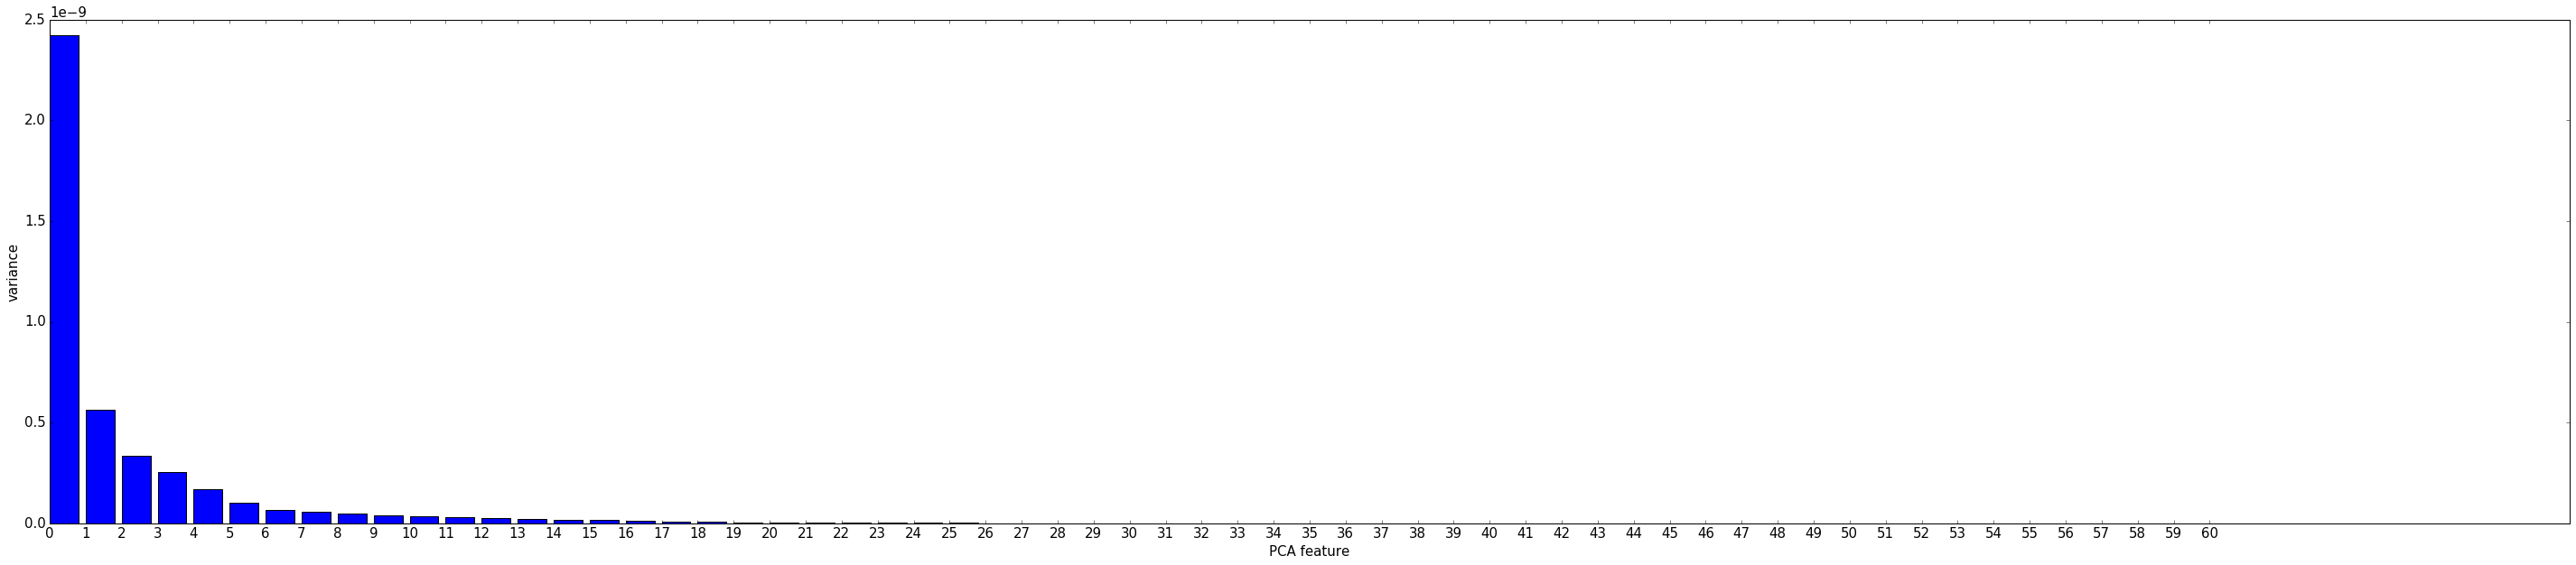

In [59]:
features = range(pca.n_components_)
plt.figure(figsize = (50,10))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

## According to plot above, we can use the first 5 components that have the hieghest variance. 

In [53]:
epochs = filter_events(epochs, [4,5])
X = epochs.get_data()
y = epochs.events[:,-1]
#initailze pca
pca = UnsupervisedSpatialFilter(PCA(5),  average=False)
#transform data
pca_data = pca.fit_transform(X)
clf = pipeline(classifier='LogisticRegression', hype_kwargs=hype_kwargs)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

<class 'sklearn.linear_model.logistic.LogisticRegression'>


In [54]:
pca_preds = np.empty(len(y))
pca_scores = []
for train, test, in cv.split(pca_data, y):
    clf.fit(pca_data[train], y[train])
#     preds[test] = clf.predict(X[test])
    scores.append(clf.score(pca_data[test],y[test]))

In [55]:
# print("list of scores", scores)
print("mean scores", np.mean(scores))

('mean scores', 0.72147435897435908)


## Since I do not understand how the instrinsic parameters work, I will loop through each file and see how many components are required on average to keep a variance of 99%

In [ ]:
def 

In [131]:
variance_retained = []
for f in filtered_epoch_files:
    epochs = mne.read_epochs(f, preload = True)
    epochs = filter_events(epochs, [4,5])
    X = epochs.get_data()
    y = epochs.events[:,-1]
    pca = UnsupervisedSpatialFilter(PCA(),  average=False)

    pca.fit_transform(X);
    evr = np.cumsum(pca.estimator.explained_variance_ratio_)
    variance_retained.append(np.argwhere(evr >.99)[0])
    print(np.argwhere(evr >.99)[0])

Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj10_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
294 matching events found
Created an SSP operator (subspace dimension = 1)
294 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
149 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
[44]
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj10_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
286 matching events found
Created an SSP operator (subspace dimension = 1)
286 matching events found
Created an SSP oper

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
275 matching events found
Created an SSP operator (subspace dimension = 1)
275 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
137 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
[22]
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj15_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
301 matching events found
Created an SSP operator (subspace dimension = 1)
301 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
150 matching event

    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
297 matching events found
Created an SSP operator (subspace dimension = 1)
297 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
148 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
[30]
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj18_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
291 matching events found
Created an SSP operator (subspace dimension = 1)
291 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
140 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
[25]
Reading C:\Users\Esim

284 matching events found
Created an SSP operator (subspace dimension = 1)
284 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
141 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
[29]
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj22_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events found
Created an SSP operator (subspace dimension = 1)
285 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
140 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
[20]
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj22_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
     

255 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
119 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
[37]
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj28_Run2-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
264 matching events found
Created an SSP operator (subspace dimension = 1)
264 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
125 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
[27]
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj28_Run3-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
  

106 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
[29]
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj6_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
221 matching events found
Created an SSP operator (subspace dimension = 1)
221 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated
82 matching events found
Created an SSP operator (subspace dimension = 1)
0 bad epochs dropped
[33]
Reading C:\Users\Esimk\OneDrive\Desktop\eeg_data\Ex10_Suj7_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
285 matching events fo

In [142]:
variance_retained_total = []
for variance in variance_retained:
    variance_retained_total.append(variance[0])

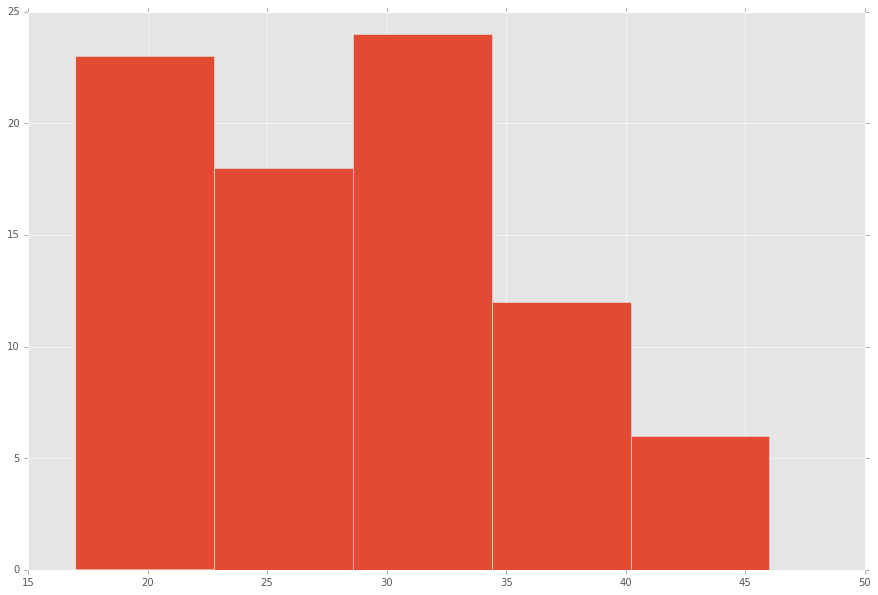

In [146]:
plt.hist(variance_retained_total, bins = 5);